# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
#ONE ACTIVITY
url = "https://api.openweathermap.org/data/2.5/weather?"
city = cities

citycount = 0

# set up lists to hold reponse info
lat = []
long = []
temp = []
humid = []
cloud = []
wind_spd = []
city_name = []
country_name = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in (cities):
    
    time.sleep(1)
   
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city 
        weather_response = requests.get(query_url)
        citycount = citycount +1
        print(f"Processing Record {citycount} of {len(cities)} | {city}")
        weather_json = weather_response.json()
        temperature = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudy = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        lats = weather_json["coord"]["lat"]
        longs = weather_json["coord"]["lon"]
        cityname = weather_json["name"]
        cname = weather_json["sys"]["country"]
        dates = weather_json["dt"]
        temp.append(temperature)
        humid.append(humidity) 
        cloud.append(cloudy)
        wind_spd.append(wind_speed)
        lat.append(lats)
        long.append(longs)
        city_name.append(cityname)
        country_name.append(cname)
        date.append(dates)
   
    except:
        print("City not found, Skipping...")
        pass
print("Completed")


Processing Record 1 of 640 | tromso
Processing Record 2 of 640 | bluff
Processing Record 3 of 640 | punta arenas
Processing Record 4 of 640 | taolanaro
City not found, Skipping...
Processing Record 5 of 640 | tautira
Processing Record 6 of 640 | souillac
Processing Record 7 of 640 | laguna
Processing Record 8 of 640 | albany
Processing Record 9 of 640 | victoria
Processing Record 10 of 640 | bolungarvik
City not found, Skipping...
Processing Record 11 of 640 | rikitea
Processing Record 12 of 640 | mataura
Processing Record 13 of 640 | kapaa
Processing Record 14 of 640 | xining
Processing Record 15 of 640 | ushuaia
Processing Record 16 of 640 | nador
Processing Record 17 of 640 | san cristobal
Processing Record 18 of 640 | tiksi
Processing Record 19 of 640 | ahuimanu
Processing Record 20 of 640 | saskylakh
Processing Record 21 of 640 | barroualie
City not found, Skipping...
Processing Record 22 of 640 | iraray
Processing Record 23 of 640 | ribeira grande
Processing Record 24 of 640 | ku

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
df = pd.DataFrame(list(zip(city_name, lat, long, temp, humid, cloud, wind_spd, country_name, date )),
                 columns = ['City Name', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

df.to_csv('carol_city_data.csv')
df.count()

City Name     580
Lat           580
Long          580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [58]:
df

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tromsø,69.65,18.96,285.15,87,75,12.90,NO,1597448976
1,Bluff,-46.60,168.33,280.93,83,77,1.79,NZ,1597448978
2,Punta Arenas,-53.15,-70.92,273.15,91,100,2.10,CL,1597448979
3,Tautira,-17.73,-149.15,301.15,69,75,4.60,PF,1597448981
4,Souillac,-20.52,57.52,294.15,73,40,2.10,MU,1597448983
...,...,...,...,...,...,...,...,...,...
575,Suicheng,33.90,117.93,300.59,87,100,3.44,CN,1597449816
576,Yulara,-25.24,130.99,284.15,53,0,2.10,AU,1597449817
577,Geraldton,-28.77,114.60,283.15,76,0,2.60,AU,1597449819
578,Guayabetal,4.21,-73.82,298.15,78,40,0.67,CO,1597449820


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
df['Humidity'].max()

100

In [69]:
df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.476293,19.630603,293.885483,71.853448,51.193103,3.547879,1.597449e+09
std,32.301120,87.642572,7.718459,20.715798,38.245285,2.464746,2.592891e+02
min,-54.800000,-175.200000,273.150000,3.000000,0.000000,0.060000,1.597449e+09
25%,-4.475000,-56.230000,287.342500,62.000000,11.000000,1.887500,1.597449e+09
50%,23.320000,25.385000,295.150000,77.000000,53.000000,2.945000,1.597449e+09
75%,46.640000,92.925000,300.102500,87.000000,90.000000,4.680000,1.597450e+09
max,78.220000,179.320000,316.150000,100.000000,100.000000,13.570000,1.597450e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

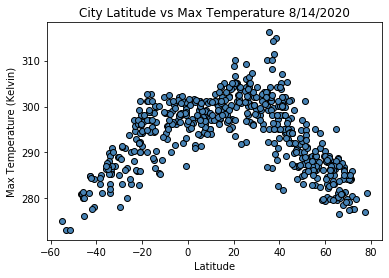

In [230]:
plt.scatter(x=df['Lat'], y=df['Max Temp'], facecolor = "steelblue", edgecolor = "black")
plt.show
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude");
plt.title("City Latitude vs Max Temperature 8/14/2020");
plt.savefig('City Latitude vs Max Temperature.png')

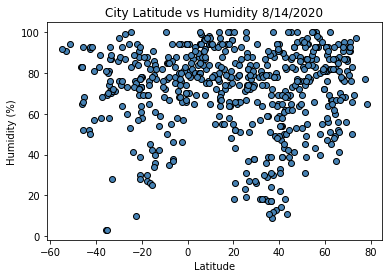

In [233]:
plt.scatter(x=df['Lat'], y=df['Humidity'], facecolor = "steelblue", edgecolor = "black")
plt.show
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude");
plt.title("City Latitude vs Humidity 8/14/2020");
plt.savefig('City Latitude vs Humidity.png')

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

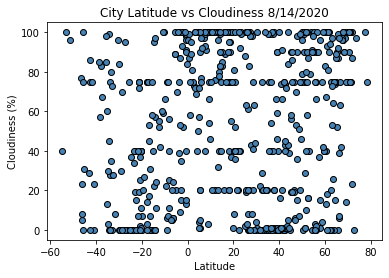

In [234]:
plt.scatter(x=df['Lat'], y=df['Cloudiness'], facecolor = "steelblue", edgecolor = "black")
plt.show
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude");
plt.title("City Latitude vs Cloudiness 8/14/2020");
plt.savefig('City Latitude vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

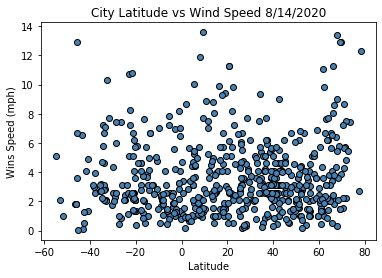

In [235]:
plt.scatter(x=df['Lat'], y=df['Wind Speed'], facecolor = "steelblue", edgecolor = "black")
plt.show
plt.ylabel("Wins Speed (mph)")
plt.xlabel("Latitude");
plt.title("City Latitude vs Wind Speed 8/14/2020");
plt.savefig('City Latitude vs Wind Speed Plot.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [208]:
Equator = df[df["Lat"] == 0]
Equator

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [155]:
# Create Northern and Southern Hemisphere DataFrames
N_hem = df[df["Lat"] > 0]
N_hem

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tromsø,69.65,18.96,285.15,87,75,12.90,NO,1597448976
5,Laguna,38.42,-121.42,314.82,13,1,3.10,US,1597448984
6,Albany,42.60,-73.97,299.82,62,74,3.09,US,1597448693
7,Hong Kong,22.29,114.16,304.26,74,0,2.36,HK,1597448852
10,Kapaa,22.08,-159.32,302.59,66,20,5.70,US,1597448910
...,...,...,...,...,...,...,...,...,...
571,Abhā,18.22,42.51,295.15,64,95,1.29,SA,1597449811
572,Amga,60.90,131.96,288.43,47,0,1.37,RU,1597449812
574,Nishihara,26.18,127.76,303.71,74,20,3.60,JP,1597449814
575,Suicheng,33.90,117.93,300.59,87,100,3.44,CN,1597449816


In [217]:
N_hem.to_csv('N_hemdata.csv', index = False)

In [157]:
S_hem = df[df["Lat"] < 0]
S_hem

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bluff,-46.60,168.33,280.93,83,77,1.79,NZ,1597448978
2,Punta Arenas,-53.15,-70.92,273.15,91,100,2.10,CL,1597448979
3,Tautira,-17.73,-149.15,301.15,69,75,4.60,PF,1597448981
4,Souillac,-20.52,57.52,294.15,73,40,2.10,MU,1597448983
8,Rikitea,-23.12,-134.97,294.72,76,40,5.13,PF,1597448989
...,...,...,...,...,...,...,...,...,...
563,Manggar,-2.88,108.27,300.81,80,35,4.25,ID,1597449799
573,Hualmay,-11.10,-77.61,288.44,82,60,5.06,PE,1597449813
576,Yulara,-25.24,130.99,284.15,53,0,2.10,AU,1597449817
577,Geraldton,-28.77,114.60,283.15,76,0,2.60,AU,1597449819


In [216]:
S_hem.to_csv('S_hemdata.csv', index = False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4977099907099571


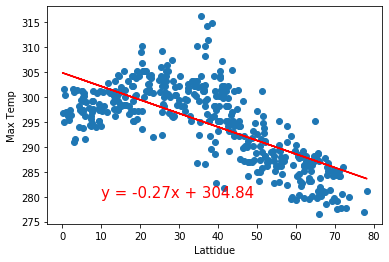

In [222]:
x=N_hem['Lat']
y=N_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,280),fontsize=15,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Lattidue")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('N.Hemisphere Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6580792520472512


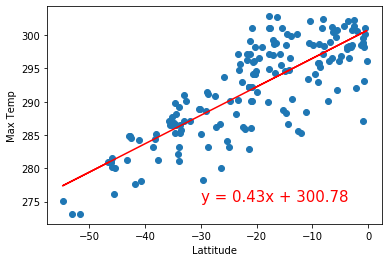

In [223]:
x=S_hem['Lat']
y=S_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Lattitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('S.Hemisphere Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003233657472738256


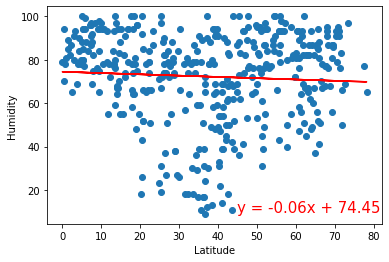

In [224]:
x=N_hem['Lat']
y=N_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('N.Hemisphere Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0034781762470448463


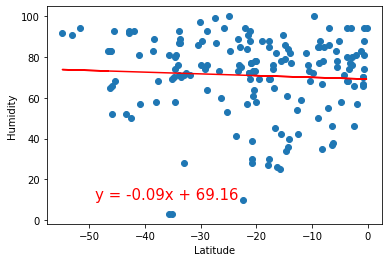

In [225]:
x=S_hem['Lat']
y=S_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-49,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('S.Hemisphere Humidity vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0032912440207149628


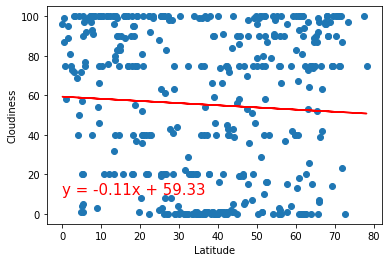

In [226]:
x=N_hem['Lat']
y=N_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('N.Hemisphere Cloudiness vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009462330683812206


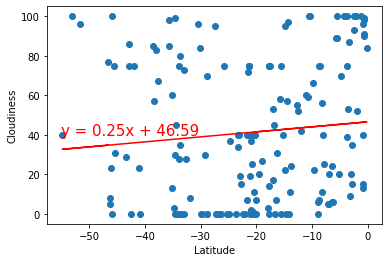

In [227]:
x=S_hem['Lat']
y=S_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('S.Hemisphere Cloudiness vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005667893297716896


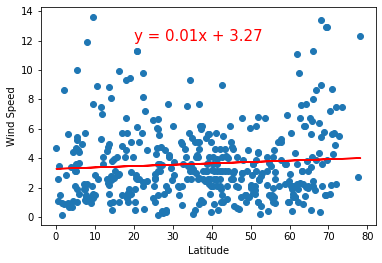

In [228]:
x=N_hem['Lat']
y=N_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,12),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('N.Hemisphere Wind Speed vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007528764235022132


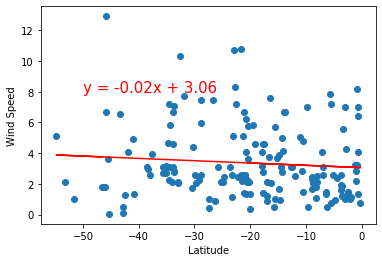

In [229]:
x=S_hem['Lat']
y=S_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show;
plt.savefig('S.Hemisphere Wind Speed vs. Latitude Linear Regression.png')

Trend Analysis
The further away from the equator the lower the Max Temp is.
Humidity for the cities chosen does not go over 100%.
% Cloudy does not seem to change based on Latitute or Hemisphere. 